In [58]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import networkx as nx
colors = ["red", "green", "blue", "orange", "yellow", "indigo", "violet", "black", "gray", "pink", "purple", "brown", "cyan", "magenta"]

**Example Graph**

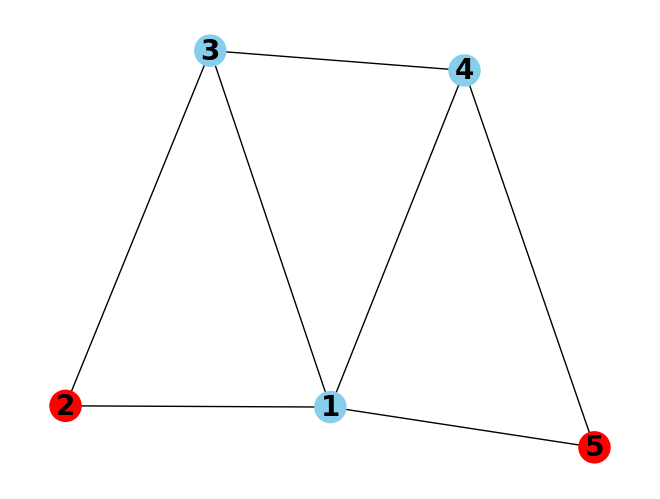

In [59]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 3), (3, 4), (4, 5),(1, 5)])
k = 3
nx.draw(G, with_labels=True, font_weight='bold', node_color=["skyblue", "red", "skyblue", "skyblue", "red"], node_size=500, font_size=20, font_color="black")
plt.savefig("Simplical_vertex.jpg", dpi=300)

**Constructing the Ideal**

In [60]:
V = [sp.var('x'+ str(i)) for i in G.nodes()]
E = [(V[i-1], V[j-1]) for i, j in G.edges()]
Sk = [ xi**k - 1 for xi in V ] # Vertex Polynomials
Sg = [sum(xi**(k-p-1)*xj**p for p in range(k)) for xi, xj in E] #Edge Polynomials

**Finding Grobner Bases**

In [61]:
result = sp.groebner(Sk + Sg, *V, order='lex')
print(result)

GroebnerBasis([x1 + x4 + x5, x2 - x4, x3 - x5, x4**2 + x4*x5 + x5**2, x5**3 - 1], x1, x2, x3, x4, x5, domain='ZZ', order='lex')


In [62]:
result != [1]

True

**Finding the explicit colorings**

In [63]:
colorings = sp.solve(result, *V)
len(colorings)

6

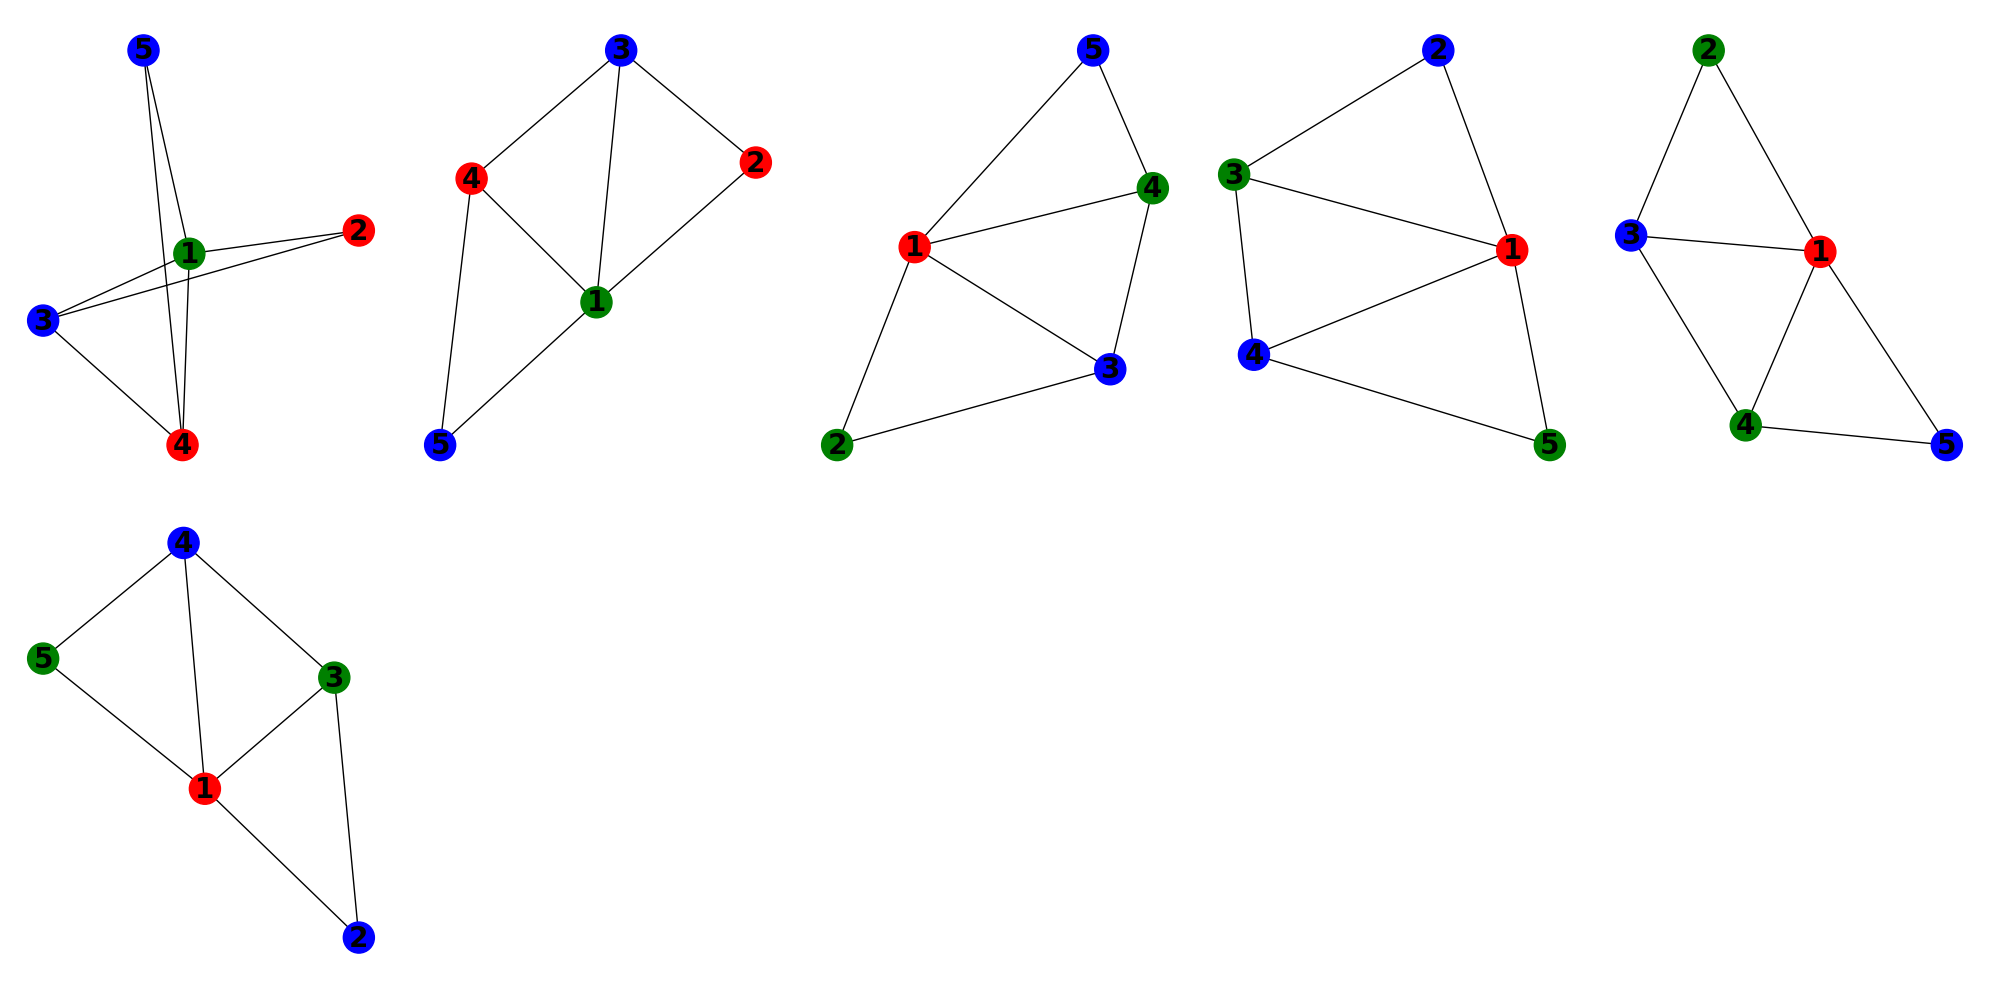

In [64]:
def plot_graphs_in_rows(G, colorings):
    colors = ["red", "green", "blue", "orange", "yellow", "indigo", "violet", "black", "gray", "pink", "purple", "brown", "cyan", "magenta"]


    num_graphs = len(colorings)
    num_rows = (num_graphs + 4) // 5  # Ceiling division to ensure at least one row
    fig, axes = plt.subplots(num_rows, 5, figsize=(20, 5 * num_rows))

    for i, ax in enumerate(axes.flat):
        if i < num_graphs:
            coloring = colorings[i]
            colormap = {}
            unique_elements = list(set(coloring))
            for j, element in enumerate(unique_elements):
                colormap[element] = colors[j]
            colorlist = tuple(colormap[element] for element in coloring)
            nx.draw(G, ax=ax, with_labels=True, font_weight='bold', node_color=colorlist, node_size=500, font_size=20, font_color="black")
        else:
            # If there are fewer than 5 graphs to display, remove unused subplots
            fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

plot_graphs_in_rows(G, colorings)

**A Polynomial Time Algorithm to find Grobner basis for coloring ideal of chrodal graphs**

In [65]:
def is_simplicial(graph, v):
    d = graph.degree(v)
    for n in graph.neighbors(v):
        common_neighbors = set(graph.neighbors(v)) & set(graph.neighbors(n))
        if len(common_neighbors) < d - 1:
            return False
    return True

In [66]:
def kth_symmetric_polynomial(a,n):
    if(n>1):
        sum=a[0]**n
        if(len(a)>1):
            for i in range(n):
                sum += (a[0]**i)*kth_symmetric_polynomial(a[1:],n-i)
        return sum
    if(n==1):
        return a.sum()
    return 1

In [67]:
# Function to build Groebner basis for coloring ideal of graph
def build_groebner_basis(graph, k):
    groebner_basis = []
    G = graph.copy()
    for i in range(len(graph) - 1, 0, -1):
        for vertex in G.nodes():
            if is_simplicial(G, vertex):
                C_i = list(G.neighbors(vertex))
                C_i.append(vertex)
                G.remove_node(vertex)
                D_i = np.array([sp.var('x'+ str(i)) for i in C_i])
                if k - len(C_i) + 1 <= 0:
                    return [1]
                S_k_C_i = kth_symmetric_polynomial(D_i, k - len(C_i) + 1)
                groebner_basis.append(S_k_C_i)
                break
    remaining_vertex = list(G.nodes())[0]
    groebner_basis.append(sp.var('x'+ str(remaining_vertex))**k - 1)
    return groebner_basis

In [68]:
groebner_basis = build_groebner_basis(G, k)
print("Groebner Basis:", groebner_basis)

Groebner Basis: [x1 + x2 + x3, x1 + x3 + x4, x1 + x4 + x5, x4**2 + x4*x5 + x5**2, x5**3 - 1]


Number of colorings: 6
Colorings: [(1, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2), (1, -1/2 + sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, -1/2 - sqrt(3)*I/2), (-1/2 - sqrt(3)*I/2, 1, -1/2 + sqrt(3)*I/2, 1, -1/2 + sqrt(3)*I/2), (-1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, 1, -1/2 + sqrt(3)*I/2, 1), (-1/2 + sqrt(3)*I/2, 1, -1/2 - sqrt(3)*I/2, 1, -1/2 - sqrt(3)*I/2), (-1/2 + sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, 1, -1/2 - sqrt(3)*I/2, 1)]
[x1, x2, x3, x4, x5]


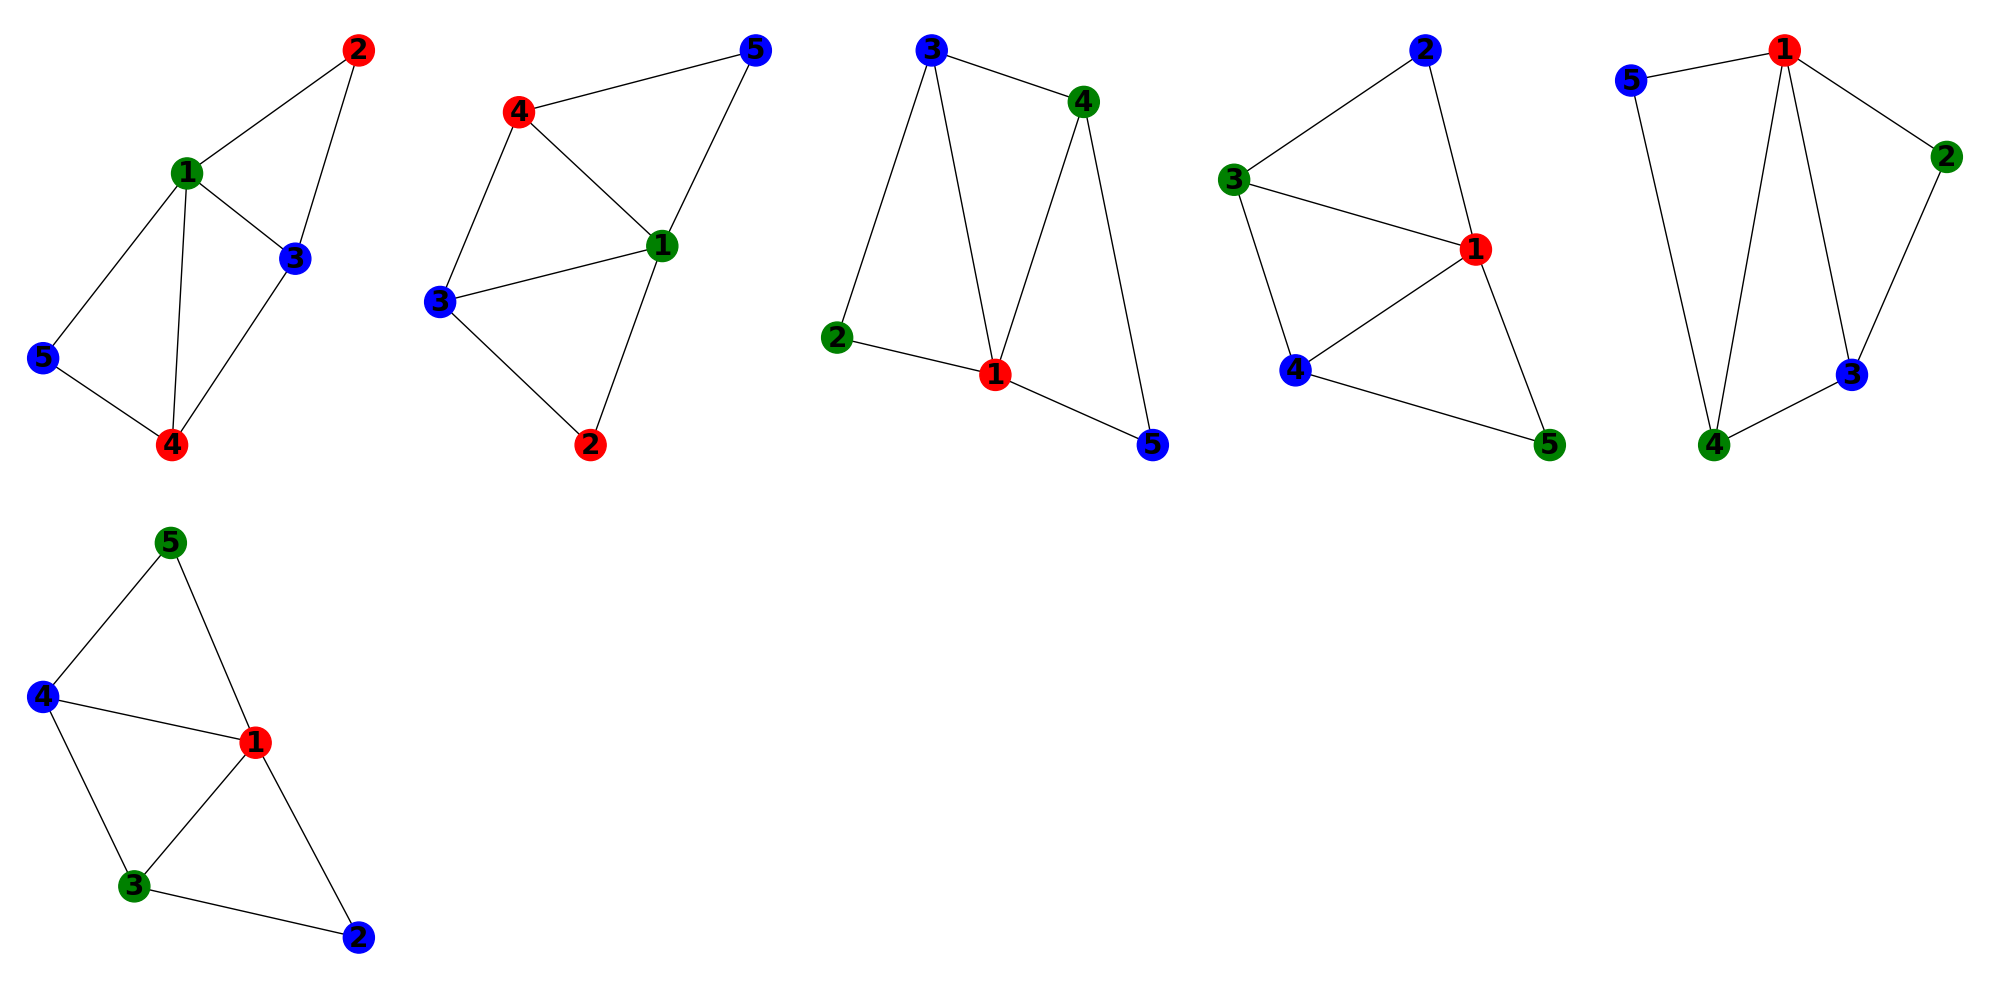

In [69]:
colorings = sp.solve(groebner_basis, *[sp.var('x'+ str(i)) for i in G.nodes()])
print("Number of colorings:", len(colorings))
print("Colorings:", colorings)
print([sp.var('x'+ str(i)) for i in G.nodes()])
if len(colorings) > 0:
    plot_graphs_in_rows(G, colorings)